In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import healpy as hp
import boto3
import numpy as np
import pygrib
import polars as pl
from datetime import datetime, timedelta
import HDA
import warnings
from scipy.interpolate import griddata
import calendar
from tqdm import tqdm

## GRIB file to pandas dataframe

In [4]:
import pygrib
import polars as pl

bbox = [42.9,0.1,40.5,3.4]
grbs = pygrib.open('/home/eouser/Desktop/ERA5/202601_42.9_0.1_40.5_3.4.grib')

In [23]:
variables = [

    {
        'paramId':134,
        'name':'Surface pressure',
        'shortName': 'sp',
        'era5_name': 'surfacePressure'
    },
    {
        'paramId':164,
        'name':'Total cloud cover',
        'shortName': 'tcc',
        'era5_name': 'totalCloudCover'
    },
    {
        'paramId':165,
        'name':'10 metre U wind component',
        'shortName': '10u',
        'era5_name': 'windSpeedEast'
    },
    {
        'paramId':166,
        'name':'10 metre V wind component',
        'shortName': '10v',
        'era5_name': 'windSpeedNorth'
    },
    {
        'paramId':167,
        'name': '2 metre temperature',
        'shortName': '2t',
        'era5_name': 'airTemperature'
    },
    {
        'paramId':168,
        'name': '2 metre dewpoint temperature',
        'shortName': '2d',
        'era5_name': 'dewAirTemperature'
    },
    {
        'paramId':169,
        'name': 'Surface short-wave (solar) radiation downwards',
        'shortName': 'ssrd',
        'era5_name': 'GHI'
    },
    {
        'paramId':175,
        'name': 'Surface long-wave (thermal) radiation downwards',
        'shortName': 'strd',
        'era5_name': 'thermalRadiation'
    }
]

In [3]:
import time

parameters = [x['CDSShortName'] for x in variables]

slc = len(parameters)
df_ = pl.DataFrame()

grb = grbs[len(grbs)]
lats = grb.latitudes
lons = grb.longitudes

mssgs = len(grbs)+1
print(mssgs)
print(slc)
lat_mask = (lats >= bbox[2]) & (lats <= bbox[0])
lon_mask = (lons >= bbox[1]) & (lons <= bbox[3])
mask = lat_mask & lon_mask


for i in range(1,len(grbs)+1,slc):
    try:
        data = {
            'latitude': [],
            'longitude': [],
            'time': []
        }
            
        for grb in grbs[i:i+slc]:
            if grb.shortName in parameters:
                filtered_values = grb.values[mask]
                data_array = np.where(filtered_values == 9999, np.nan, filtered_values)
                data.update({grb.shortName: data_array.flatten()})
            else:
                print(f"{grb.shortName} is not in ERA5 dictionary")
        if i == mssgs - slc: 
            grb = grbs[mssgs-1]  
            if grb.shortName in parameters:
                filtered_values = grb.values[mask]
                data_array = np.where(filtered_values == 9999, np.nan, filtered_values)
                data.update({grb.shortName: data_array.flatten()})
            else:
                print(f"{grb.shortName} is not in ERA5 dictionary")
                
        time2 = grb.validDate
        data['latitude'].extend(lats[mask].flatten())
        data['longitude'].extend(lons[mask].flatten())
        data['time'].extend([time2] * len(lons[mask].flatten()))
        df_ = pl.concat([df_, pl.DataFrame(data)])   

    except Exception as e:
        print(e)
        print(grb)
        print(f"Error in message {i}")

df_

8915
12
boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 140
1:10 metre U wind component:m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010000
Error in message 1
boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 140
13:2 metre dewpoint temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010100
Error in message 13
boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 140
25:Leaf area index, high vegetation:m**2 m**-2 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010200
Error in message 25
boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 140
37:Forecast albedo:(0 - 1) (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010300
Error in message 37
boole

KeyboardInterrupt: 

In [5]:
grb.validDate

datetime.datetime(1940, 1, 2, 2, 0)

In [ ]:

# for i in range(1,len(grbs)+1,slc):
#     try:
#         data = {
#             'latitude': [],
#             'longitude': [],
#             'time': []
#         }
            
#         for grb in grbs[i:i+slc]:
#             if grb.shortName in parameters:
#                 filtered_values = grb.values[mask]
#                 data_array = np.where(filtered_values == 9999, np.nan, filtered_values)
#                 data.update({grb.shortName: data_array.flatten()})
#             else:
#                 print(f"{grb.shortName} is not in ERA5 dictionary")
#         if i == mssgs - slc: 
#             grb = grbs[mssgs-1]  
#             if grb.shortName in parameters:
#                 filtered_values = grb.values[mask]
#                 data_array = np.where(filtered_values == 9999, np.nan, filtered_values)
#                 data.update({grb.shortName: data_array.flatten()})
#             else:
#                 print(f"{grb.shortName} is not in ERA5 dictionary")
                
#         time2 = grb.validDate
#         data['latitude'].extend(lats[mask].flatten())
#         data['longitude'].extend(lons[mask].flatten())
#         data['time'].extend([time2] * len(lons[mask].flatten()))
#         df_ = pl.concat([df_, pl.DataFrame(data)])   

#     except Exception as e:
#         print(e)
#         print(grb)
#         print(f"Error in message {i}")

# df_

In [ ]:

# for i in range(1,len(grbs)+1,slc):
#     try:
#         data = {
#             'latitude': [],
#             'longitude': [],
#             'time': []
#         }
            
#         for grb in grbs[i:i+slc]:
#             if grb.shortName in parameters:
#                 filtered_values = grb.values[mask]
#                 data_array = np.where(filtered_values == 9999, np.nan, filtered_values)
#                 data.update({grb.shortName: data_array.flatten()})
#             else:
#                 print(f"{grb.shortName} is not in ERA5 dictionary")
#         if i == mssgs - slc: 
#             grb = grbs[mssgs-1]  
#             if grb.shortName in parameters:
#                 filtered_values = grb.values[mask]
#                 data_array = np.where(filtered_values == 9999, np.nan, filtered_values)
#                 data.update({grb.shortName: data_array.flatten()})
#             else:
#                 print(f"{grb.shortName} is not in ERA5 dictionary")
                
#         time2 = grb.validDate
#         data['latitude'].extend(lats[mask].flatten())
#         data['longitude'].extend(lons[mask].flatten())
#         data['time'].extend([time2] * len(lons[mask].flatten()))
#         df_ = pl.concat([df_, pl.DataFrame(data)])   

#     except Exception as e:
#         print(e)
#         print(grb)
#         print(f"Error in message {i}")

# df_

In [7]:
# import time

# parameters = [x['shortName'] for x in variables]

# slc = len(parameters)
# df_ = pl.DataFrame()

# grb = grbs[len(grbs)]
# lats = grb.latitudes
# lons = grb.longitudes

# lat_mask = (lats >= bbox[2]) & (lats <= bbox[0])
# lon_mask = (lons >= bbox[1]) & (lons <= bbox[3])
# mask = lat_mask & lon_mask


# data = {
# 	'latitude': [],
# 	'longitude': [],
# 	'time': []
# }
# for i in range(185,193):
# 	grb = grbs[i]
# 	if grb.shortName in parameters:
# 		print(grb.shortName)
# 		filtered_values = grb.values[mask]
# 		data_array = np.where(filtered_values == 9999, np.nan, filtered_values)
# 		data[grb.shortName] = data_array.flatten()
# 	else:
# 		print(f"{grb.shortName} is not in ERA5 dictionary")
# time2 = grb.validDate
# data['latitude'].extend(lats[mask].flatten())
# data['longitude'].extend(lons[mask].flatten())
# data['time'].extend([time2] * len(lons[mask].flatten()))
# df_ =  pl.concat([df_, pl.DataFrame(data)])



# df_

In [8]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the shapefile
postalcodes_path = '/home/eouser/Desktop/SpanishPostalCodes/Catalonia/postal_codes.shp'
gdf = gpd.read_file(postalcodes_path)
gdf = gdf.to_crs(epsg=4326)
print(f"Number of postal codes: {len(gdf['COD_POSTAL'].unique())}")


Number of postal codes: 1137


In [9]:
pandas_dataframe = df_.to_pandas()
df_null = pandas_dataframe.where(pd.notnull(pandas_dataframe), None)
df_null[df_null.isnull().any(axis=1)]

,latitude,longitude,time,sp,tcc,10u,10v,2t,2d,ssrd,strd


In [10]:
pandas_dataframe = df_.to_pandas()
df_null = pandas_dataframe.where(pd.notnull(pandas_dataframe), None)
df = df_null[-df_null.isnull().any(axis=1)]

In [11]:
import polars as pl

df = pl.from_pandas(df)
lat1 = df.select(['latitude', 'longitude']).unique()["latitude"] # 558
lon1 = df.select(['latitude', 'longitude']).unique()["longitude"] # 558
features = df.drop(['time','latitude', 'longitude']).columns # 12
points = np.array(list(zip(lat1, lon1))) # 558,2

gdf = gdf.to_crs(epsg=4326)
gdf['centroid'] = gdf.geometry.centroid
lat2 = gdf['centroid'].y # 1137
lon2 = gdf['centroid'].x # 1137
postalcodes = gdf['COD_POSTAL'] # 1137
grid_points = np.array(list(zip(lat2, lon2))) # 1137,2


dfs =[]
for group_name, group_df in df.group_by(["time"]): #2021-07-15 05:00
    result_df = pl.DataFrame({
        'postalCode': postalcodes, # 1137
        'latitude': lat2, # 1137
        'longitude': lon2, # 1137
        'time': group_name * len(lon2) # 1137
    })
    # lat1 = group_df.select(['latitude', 'longitude']).unique()["latitude"] # 558
    # lon1 = group_df.select(['latitude', 'longitude']).unique()["longitude"] 
    # points = np.array(list(zip(lat1, lon1))) # 558,2
    for feature in features:
        values = group_df[feature] # 557 10u
        interpolated_values = griddata(points, values, grid_points, method='linear')
        nearest_values = griddata(points, values, grid_points, method='nearest')
        interpolated_values = np.where(np.isnan(interpolated_values), nearest_values, interpolated_values)
        result_df.insert_column(-1,pl.Series(feature,interpolated_values))

    dfs.append(result_df)
    
df_interp = pl.concat(dfs)

/tmp/ipykernel_3587177/4245767089.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


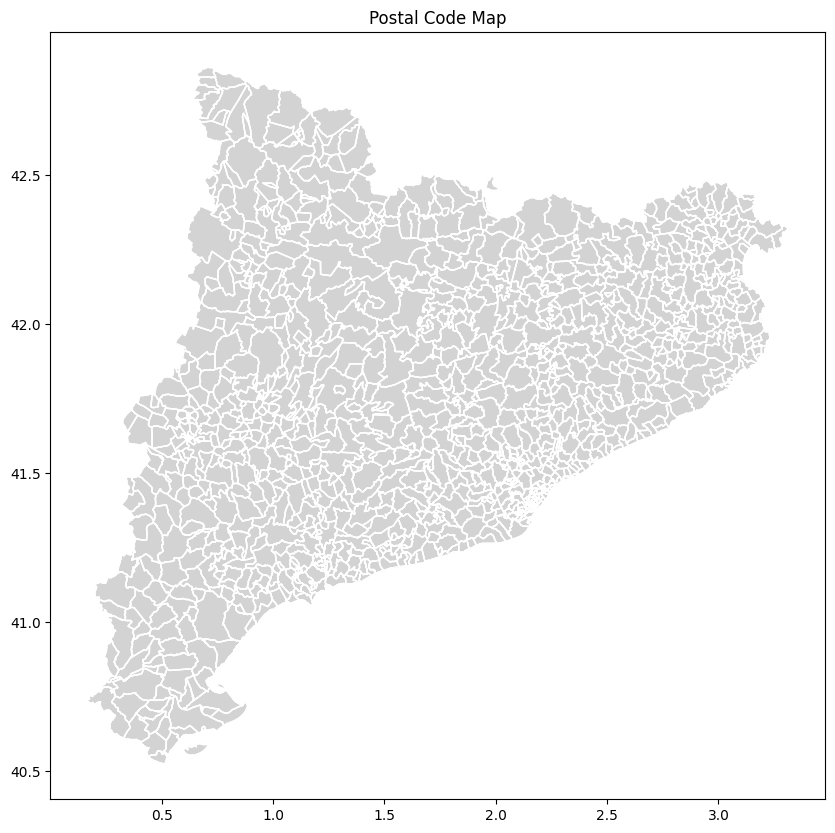

In [12]:
import matplotlib.pyplot as plt

pandas_dataframe = df_interp.to_pandas()
df_null = pandas_dataframe.where(pd.notnull(pandas_dataframe), None)
nulls = df_null[df_null.isnull().any(axis=1)]
postal_codes = pd.unique(nulls['postalCode'])

gdf['color'] = gdf['COD_POSTAL'].apply(lambda x: 'red' if x in postal_codes else 'lightgrey')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax, linewidth=1, color='white')  # Plot boundaries
gdf.plot(ax=ax, color=gdf['color'], edgecolor='white')  # Plot colored postal codes

# Add title and show the plot
plt.title('Postal Code Map')
plt.show()

Number of meteorological stations within Catalonia: 795


<Axes: >

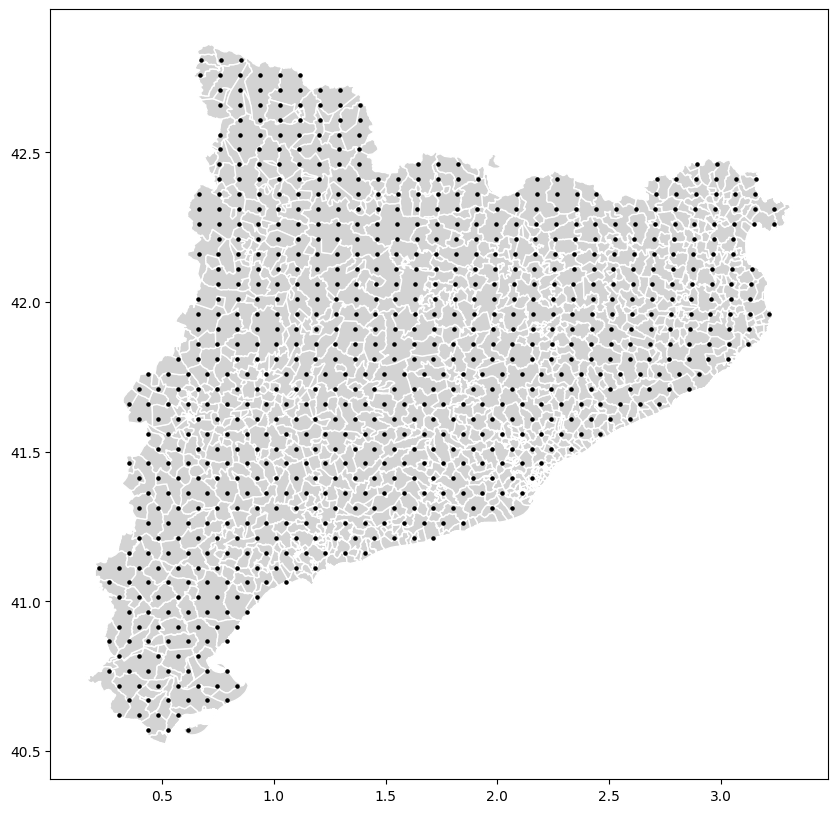

In [13]:
import matplotlib.pyplot as plt

latslons = df_.unique(subset=['latitude', 'longitude'])['latitude','longitude']
geometry = [Point(lon, lat) for lon, lat in zip(latslons['longitude'], latslons['latitude'])]
geo_df = gpd.GeoDataFrame(latslons, geometry=geometry, crs='EPSG:4326')

filtered_gdf = geo_df[geo_df.geometry.within(gdf.union_all())]
filter = pl.DataFrame(filtered_gdf.drop(columns='geometry'))
filter = filter.rename({'0':'latitude','1':'longitude'})
print(f"Number of meteorological stations within Catalonia: {len(filter)}")

# highlight_points = [(0.7,41.6), (2.2, 41.4), (1.5, 41.2)]
# highlight_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in highlight_points], crs='EPSG:4326')

fig, ax = plt.subplots(figsize=(12, 10)) 
ax = gdf["geometry"].plot(ax=ax, color="lightgray", edgecolor="white")
filtered_gdf.plot(ax=ax, color="black",markersize=5)
# highlight_gdf.plot(ax=ax, color="red", markersize=10)

In [14]:
df_

latitude,longitude,time,sp,tcc,10u,10v,2t,2d,ssrd,strd
f64,f64,datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64
40.52197,3.208008,2026-01-01 00:00:00,101406.96875,1.0,1.018925,-1.038597,286.972755,281.742981,0.0,1.2798e6
40.52197,3.120117,2026-01-01 00:00:00,101405.3125,1.0,1.20607,-0.601776,286.972496,281.842957,0.0,1.2829e6
40.57106,3.1640625,2026-01-01 00:00:00,101403.363281,1.0,0.815567,-1.248512,286.713898,281.768166,0.0,1.2840e6
40.52197,3.383789,2026-01-01 00:00:00,101433.527344,1.0,-0.466808,-3.115738,287.10453,281.702492,0.0,1.2935e6
40.52197,3.295898,2026-01-01 00:00:00,101411.636719,1.0,0.47543,-2.01516,287.063187,281.675041,0.0,1.2898e6
…,…,…,…,…,…,…,…,…,…,…
41.460945,0.175781,2026-01-01 23:00:00,98625.523438,0.0,5.927444,-4.735067,278.300652,273.504616,0.0,877375.625
41.510739,0.219727,2026-01-01 23:00:00,98067.503906,0.0,6.236473,-5.78998,277.789574,273.440109,0.0,871199.125
41.510739,0.131836,2026-01-01 23:00:00,98444.980469,0.0,6.720531,-6.075724,278.192642,273.55014,0.0,870093.5


In [15]:
era_5 = {x['shortName']:x['era5_name'] for x in variables}
df_ = df_interp.join(filter, on=['latitude', 'longitude'], how='inner')
df_ = df_.fill_nan(None)
print(f"Number of null values: {df_.null_count()}")
print(f"Original shape: {df_.shape}")
df_ = df_.drop_nulls()
df_ = df_.rename(era_5)
print(f"Current shape: {df_.shape}")

Number of null values: shape: (1, 12)
┌────────────┬──────────┬───────────┬─────┬───┬─────┬──────┬──────┬──────┐
│ postalCode ┆ latitude ┆ longitude ┆ sp  ┆ … ┆ 2d  ┆ ssrd ┆ strd ┆ time │
│ ---        ┆ ---      ┆ ---       ┆ --- ┆   ┆ --- ┆ ---  ┆ ---  ┆ ---  │
│ u32        ┆ u32      ┆ u32       ┆ u32 ┆   ┆ u32 ┆ u32  ┆ u32  ┆ u32  │
╞════════════╪══════════╪═══════════╪═════╪═══╪═════╪══════╪══════╪══════╡
│ 0          ┆ 0        ┆ 0         ┆ 0   ┆ … ┆ 0   ┆ 0    ┆ 0    ┆ 0    │
└────────────┴──────────┴───────────┴─────┴───┴─────┴──────┴──────┴──────┘
Original shape: (0, 12)
Current shape: (0, 12)


In [16]:
import pvlib

df = df_
df = df.sort(["latitude", "longitude", "time"])
df = df.with_columns([
    np.sqrt(pl.col("windSpeedEast") ** 2 + pl.col("windSpeedNorth") ** 2).alias("windSpeed"),
    ((180 + np.degrees(np.arctan2(pl.col("windSpeedEast"), pl.col("windSpeedNorth")))) % 360).alias("windDirection"),
    (pl.col("dewAirTemperature") - 273.15).alias("dewAirTemperature"),
    (pl.col("airTemperature") - 273.15).alias("airTemperature")
])
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df = df.with_columns(
        pl.when(pl.col("airTemperature").is_null() | pl.col("dewAirTemperature").is_null())
        .then(None)
        .otherwise(100* np.exp((17.625 *  pl.col("dewAirTemperature")) / (243.04 +  pl.col("dewAirTemperature")))/
                   np.exp((17.625 * pl.col("airTemperature")) / (243.04 + pl.col("airTemperature")))
                   ).alias("relativeHumidity")
    )
    
# Accummulative parameters: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Table3
acumm =  [ 'GHI','thermalRadiation']
df = df.with_columns(
    pl.when(pl.col("time") == df.select(pl.col("time").min()).item())
    .then(0)
    .when(pl.col("time") == df.select(pl.col("time").max()).item())
    .then(0)
    .otherwise((pl.col("thermalRadiation").shift(-1) - pl.col("thermalRadiation")) / 3600)
    .alias("thermalRadiation_avg")
)
df = df.with_columns(
    pl.when(pl.col("time") == df.select(pl.col("time").min()).item())
    .then(0)
    .when(pl.col("time") == df.select(pl.col("time").max()).item())
    .then(0)
    .otherwise((pl.col("GHI").shift(-1) - pl.col("GHI")) / 3600)
    .alias("GHI_avg")
)

df = df.with_columns(
    pl.when(pl.col("GHI_avg") > 0)
    .then(pl.col("GHI_avg"))
    .otherwise(0)
    .alias("GHI_avg")
)
df = df.with_columns(
    pl.when(pl.col("thermalRadiation_avg") > 0)
    .then(pl.col("thermalRadiation_avg"))
    .otherwise(0)
    .alias("thermalRadiation_avg")
)


# Instantaneous parameters: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Table2
analysis = [x for x in era_5.values() if x not in acumm] + ["windSpeed"] + ["windDirection"] + ["relativeHumidity"]
print(analysis)
for var in analysis:
    df = df.with_columns(
        pl.when(pl.col("time") < df.select(pl.col("time").max()).item())
        .then((pl.col(var).shift(-1) + pl.col(var)) / 2)
        .otherwise(pl.col(var))
        .alias(f"{var}_avg")
    )
print(f"Before drop: {len(df)}")

df = df.drop(analysis)
df = df.drop(acumm)
rename_map = {col: col.replace("_avg", "") for col in df.columns if col.endswith("_avg")}
df = df.rename(rename_map)
print(f"After drop: {len(df)}")
def join_solar_data(df):
    dfp = df.to_pandas()
    location = pvlib.location.Location(
        latitude=df.select("latitude").unique().item(),
        longitude=df.select("longitude").unique().item())
    solar_df = location.get_solarposition(
        dfp['time'] + pd.Timedelta(minutes=30),
        pressure=dfp['surfacePressure'],
        temperature=dfp['airTemperature']).reset_index()
    dni = pvlib.irradiance.disc(
        ghi=dfp["GHI"],
        solar_zenith=solar_df['apparent_zenith'],
        datetime_or_doy=solar_df['time'].dt.dayofyear,
        pressure=dfp["surfacePressure"])
    rad_df = pvlib.irradiance.complete_irradiance(
        solar_zenith=solar_df['apparent_zenith'],
        ghi=dfp["GHI"],
        dni=dni["dni"],
        dhi=None).rename(columns={'ghi':'GHI','dni':'DNI','dhi':'DHI'})
    solar_df = solar_df.drop(['apparent_zenith', 'zenith', 'apparent_elevation', 'equation_of_time'], axis=1)
    solar_df = solar_df.rename(columns={'elevation': 'sunElevation', 'azimuth': 'sunAzimuth'})
    solar_df['time'] = (solar_df['time'] - pd.Timedelta(minutes=30)).astype('datetime64[us]')
    solar_df = pl.from_pandas(pd.concat([solar_df, rad_df], axis=1))

    return solar_df.join(df.drop("GHI"), on="time", how="inner")

# Loop through each group and apply the join_solar_data function
result_list = []
for group_name, group_df in df.group_by(["latitude","longitude"]):
    result = join_solar_data(group_df)
    result_list.append(result)
    
    
print(f"After res: {len(result)}")    
print(f"After sun: {len(result_list)}")    
df = pl.concat(result_list)

df

['surfacePressure', 'totalCloudCover', 'windSpeedEast', 'windSpeedNorth', 'airTemperature', 'dewAirTemperature', 'windSpeed', 'windDirection', 'relativeHumidity']
Before drop: 0
After drop: 0


/tmp/ipykernel_3587177/3593750013.py:24: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  pl.when(pl.col("time") == df.select(pl.col("time").min()).item())
/tmp/ipykernel_3587177/3593750013.py:26: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  .when(pl.col("time") == df.select(pl.col("time").max()).item())
/tmp/ipykernel_3587177/3593750013.py:32: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  pl.when(pl.col("time") == df.select(pl.col("time").min()).item())
/tmp/ipykernel_3587177/3593750013.py:34: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  .when(pl.col("time") == df.select(pl.col("time").max()).item())
/tmp/ipykernel_3587177/3593750013.py:59: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_n

NameError: name 'result' is not defined

In [ ]:
pandas_dataframe = df.to_pandas()
df = df.rename({'postalCode':'postal_code'})
df_null = pandas_dataframe.where(pd.notnull(pandas_dataframe), None)
df_null[df_null.isnull().any(axis=1)]


In [ ]:
import psycopg2

db_name = 'postgres'
db_user = 'postgres'
db_password = 'D2st3n1t34n21rth$'
db_host = '217.71.195.214'
db_port = '5432' 

conn = psycopg2.connect(f"dbname={db_name} user={db_user} password={db_password} host={db_host} port={db_port} sslmode=require")
cursor = conn.cursor()


dtype_map = {
    'object': 'VARCHAR',
    'int64': 'INTEGER',
    'float64': 'FLOAT',
    'datetime64[ns]': 'TIMESTAMP',
    'datetime64[us]': 'TIMESTAMP'
}

def check_table_exists(table_name):
    query = f"""
        SELECT COUNT(*)
        FROM information_schema.tables
        WHERE table_schema = 'public' AND table_name = '{table_name}'
    """
    cursor.execute(query)
    return cursor.fetchone()[0] 

def upload_data(df, table_name):
    if isinstance(df, pl.DataFrame):
        df = df.to_pandas()
    print(len(df))
            
    if not check_table_exists(table_name):
        columns = []
        for col_name, dtype in df.dtypes.items():
            pg_type = dtype_map.get(str(dtype), 'VARCHAR')
            columns.append(f"{col_name} {pg_type}")
        create_table_query = f"""
        CREATE TABLE {table_name} (
            {', '.join(columns)},
            PRIMARY KEY (time, postal_code)
        );
        CREATE INDEX ON {table_name} (time, postal_code);
        SELECT create_hypertable('{table_name}','time');
        """
        
        cursor.execute(create_table_query)
        conn.commit()

    insert_query = f"""
    INSERT INTO {table_name} ({','.join(df.columns)})
    VALUES ({','.join(['%s'] * len(df.columns))})
    ON CONFLICT (time,postal_code) DO UPDATE SET
    {', '.join([f"{col} = EXCLUDED.{col}" for col in df.columns])};
    """

    for x in tqdm(df.to_numpy(), desc=f"Inserting {table_name} rows", unit="rows"):
        cursor.execute(insert_query,tuple(x))
    conn.commit()
    
upload_data(df,table_name="climatedt")